In [4]:
from scipy import integrate
import numpy as np

from probability_distribution import mu_gaussians, mu_normalize, mu_display2D, uniform
# mu_total, _ = integrate.nquad(lambda *x: mu(np.array(x)), int_bounds)

In [75]:
def circle_mu(mu, r, int_bounds, integration):
    def circle(x):
        def probability_in_circle(y):
            if np.linalg.norm(x-y) <= r:
                return mu(y)
            else:
                return 0
        prob_in_circle, _ = integration(lambda *z: probability_in_circle(np.array(z)), int_bounds)#, opts={'epsabs':1e-4, 'epsrel':1e-4})
        return prob_in_circle
    return circle

def communication_probability(mu, r, bounds, integration):
    int_bounds = [[0, bounds[i]] for i in range(len(bounds))]
    circle_m = circle_mu(mu, r, int_bounds, integration)
    comm_prob, _ = integration(lambda *x: mu(np.array(x))*circle_m(np.array(x)), int_bounds)#, opts={'epsabs':1e-4, 'epsrel':1e-4})
    return comm_prob

def display_communication_probability(name, mu, r, bounds, integration):
    print("Displaying: ", name, " communication range: ", r)
    comm_prob = communication_probability(mu, r, bounds, integration)
    print("Communication probability: ", comm_prob)

In [76]:
def dot_prod_integrate(func, int_bounds, size=50):
    xs = []
    for i in range(len(int_bounds)):
        xs.append(np.linspace(int_bounds[i][0], int_bounds[i][1], size+1))
    xsg = np.meshgrid(*xs, indexing='ij')
    xsgf = [xg.flatten() for xg in xsg]
    xvec = np.stack(xsgf, axis=1)
    gridarea = (1/size)**len(int_bounds)
    f = []
    for i in range((size + 1)**len(int_bounds)):
        f.append(func(*tuple(xvec[i,:])))
    return sum(f)*gridarea, None
        
print(dot_prod_integrate(lambda *x: x[0]*x[1], [[0,1],[0,1]]))

(0.26009999999999994, None)


Displaying:  uniform  communication range:  0.1
Communication probability:  0.029696159999999677
Displaying:  uniform  communication range:  0.25
Communication probability:  0.16330256000000207
Displaying:  uniform  communication range:  0.5
Communication probability:  0.50780432
Displaying:  uniform  communication range:  0.75
Communication probability:  0.8497275200000006
Displaying:  uniform  communication range:  1
Communication probability:  1.0486606400000162
Displaying:  one_gaussian  communication range:  0.1
Communication probability:  0.4012872410949724
Displaying:  one_gaussian  communication range:  0.25
Communication probability:  0.9617651591116563
Displaying:  one_gaussian  communication range:  0.5
Communication probability:  1.0035980904953858
Displaying:  one_gaussian  communication range:  0.75
Communication probability:  1.003599207132009
Displaying:  one_gaussian  communication range:  1
Communication probability:  1.0035992071320108
Displaying:  two_big_one_small 

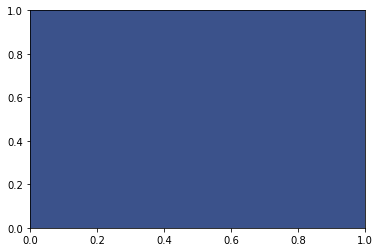

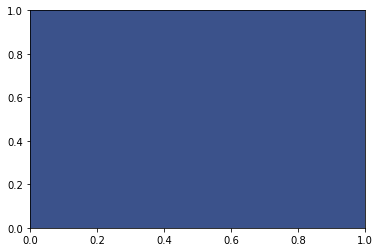

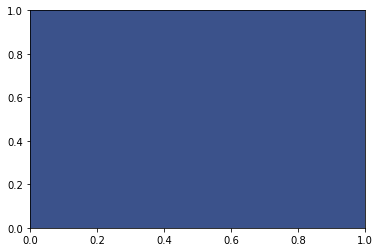

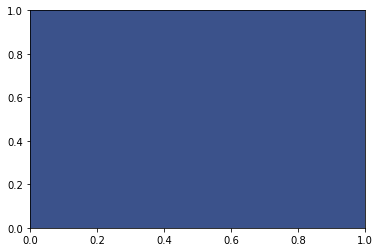

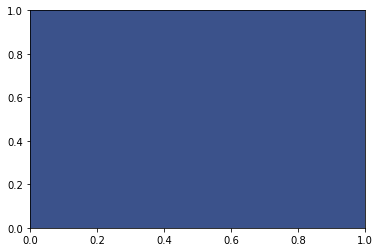

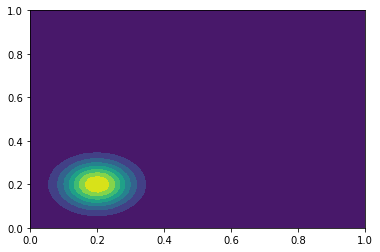

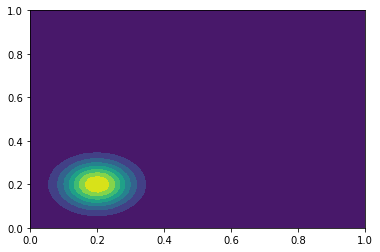

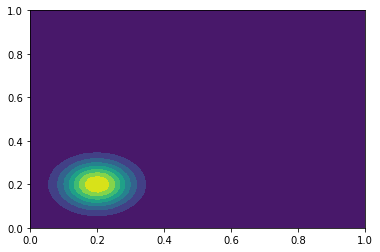

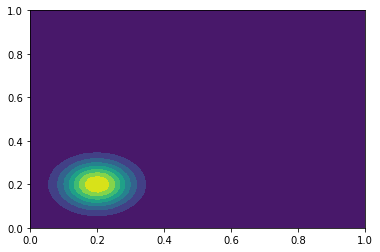

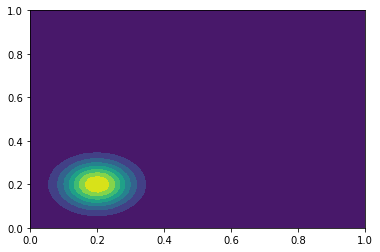

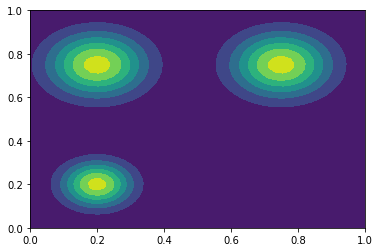

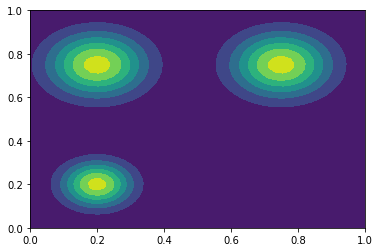

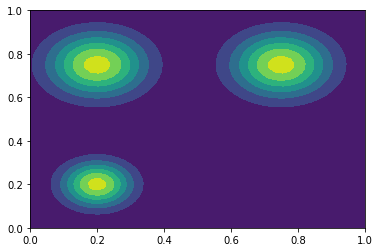

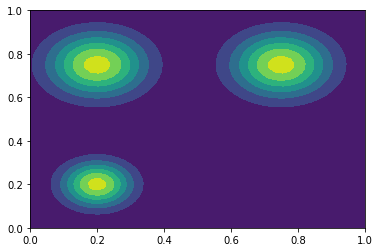

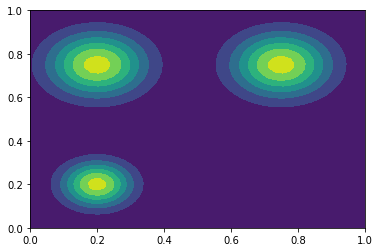

In [77]:
U_shape = np.array([1,1])
unif = mu_normalize(uniform(U_shape), U_shape)
one_gaussian = mu_normalize(mu_gaussians([(0.2, 0.01)], U_shape), U_shape)
two_big_one_small = mu_normalize(mu_gaussians([(0.2, 0.01), (0.75, 0.02), (np.array([0.2, 0.75]), 0.02)], U_shape), U_shape)
distributions = {
    'uniform': unif,
    'one_gaussian': one_gaussian,
    'two_big_one_small': two_big_one_small
}
# integration = integrate.nquad
integration = dot_prod_integrate

for key in distributions:
    dist = distributions[key]
    mu_display2D(dist, U_shape)
    for r in [0.1, 0.25, 0.5, 0.75, 1]:
        display_communication_probability(key, dist, r, U_shape, integration)